In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("India_automobile_buying_behaviour.csv")

In [43]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


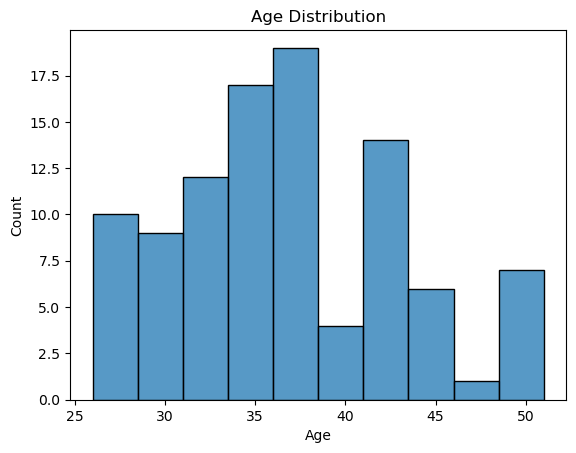

In [44]:
sns.histplot(data=df, x='Age', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

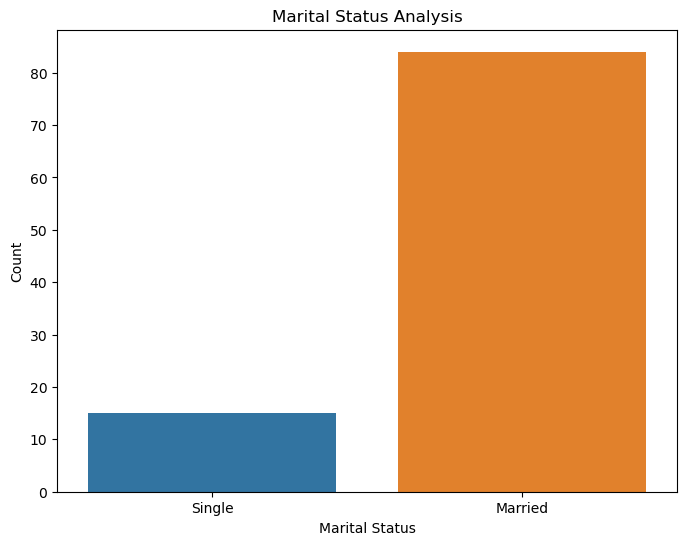

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marrital Status')
plt.title('Marital Status Analysis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

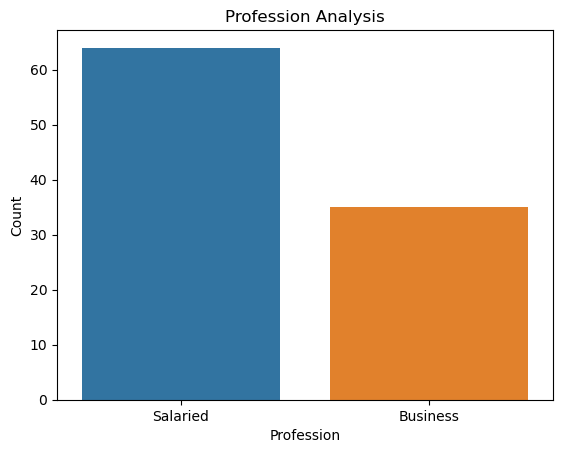

In [46]:
sns.countplot(data=df, x='Profession')
plt.title('Profession Analysis')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

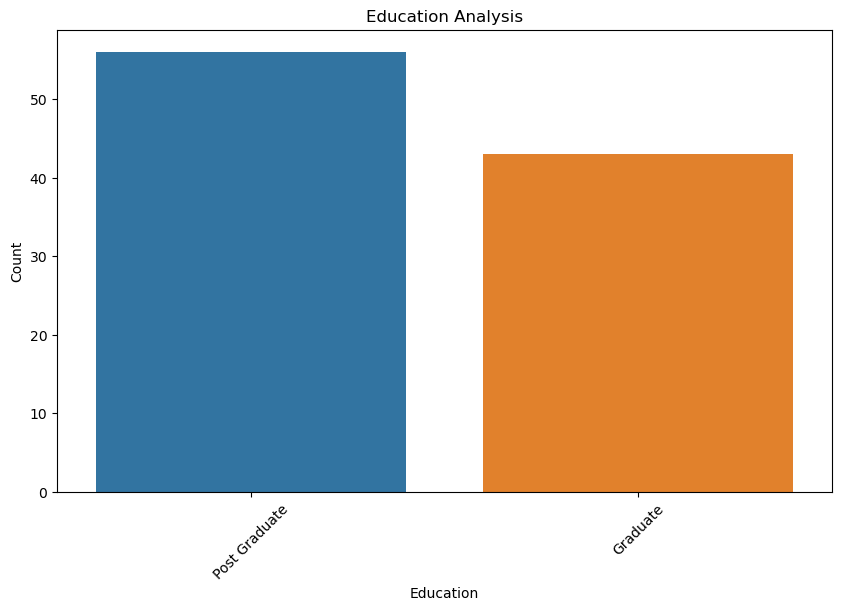

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education')
plt.title('Education Analysis')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

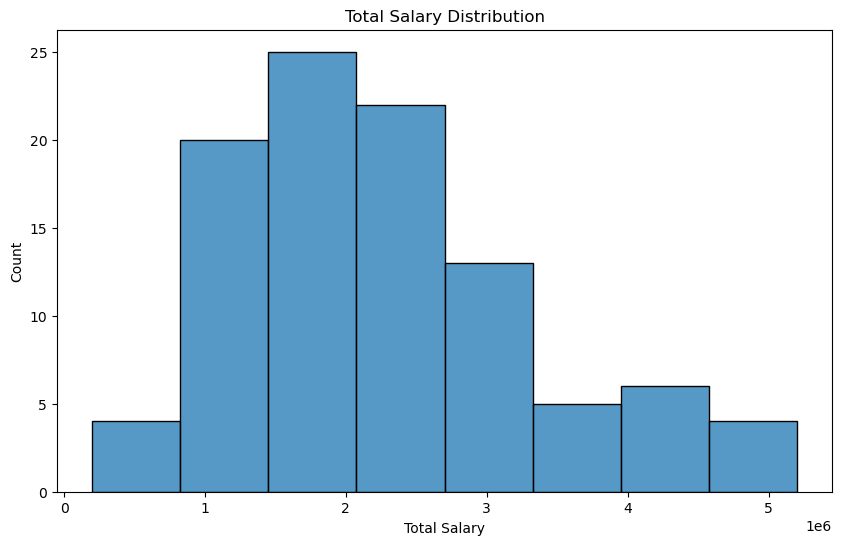

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Salary', bins=8)
plt.title('Total Salary Distribution')
plt.xlabel('Total Salary')
plt.ylabel('Count')
plt.show()

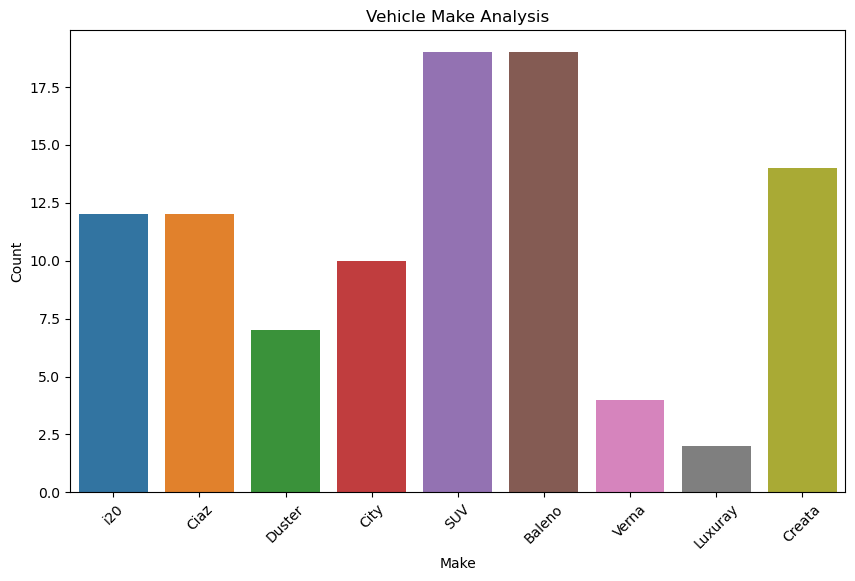

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make')
plt.title('Vehicle Make Analysis')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [50]:
df['Car Spending %'] = (df['Price'] / df['Total Salary']) * 100

In [51]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Car Spending %
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,100.000000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,50.000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,66.666667
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,54.545455
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,61.538462


In [52]:
outliers = df['Car Spending %'].idxmax()
df = df.drop(outliers)

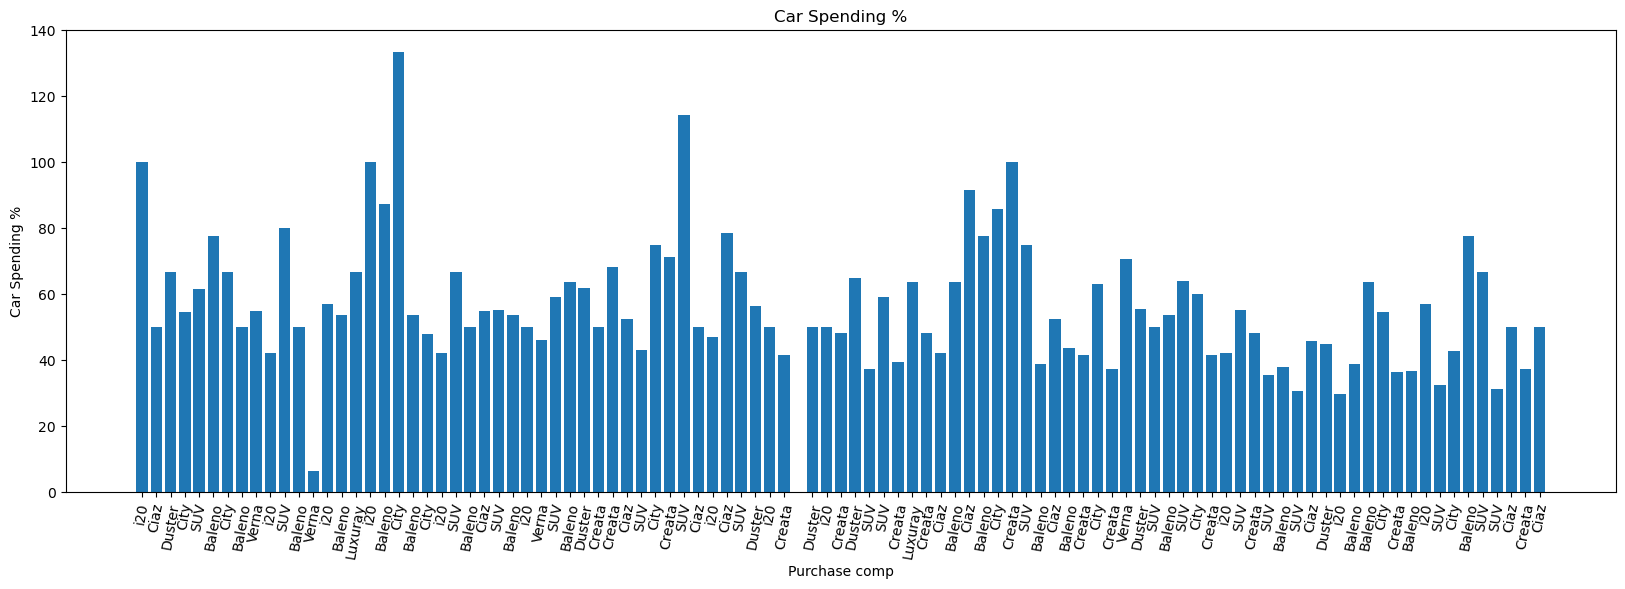

In [53]:
plt.figure(figsize=(20, 6))
plt.bar(df.index, df['Car Spending %'])
plt.title('Car Spending %')
plt.xlabel('Purchase comp')
plt.ylabel('Car Spending %')
plt.xticks(df.index, df['Make'], rotation=80)
plt.show()

<Figure size 1000x600 with 0 Axes>

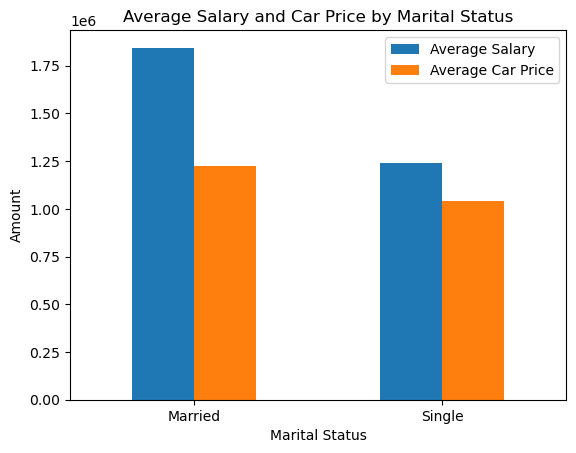

In [54]:
grouped_df = df.groupby('Marrital Status').agg({'Salary': 'mean', 'Price': 'mean'})
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('Average Salary and Car Price by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.legend(['Average Salary', 'Average Car Price'])
plt.xticks(rotation=0)
plt.show()

In [55]:
def salaryf(x, pos):
    return '₹{:,.0f}'.format(x)

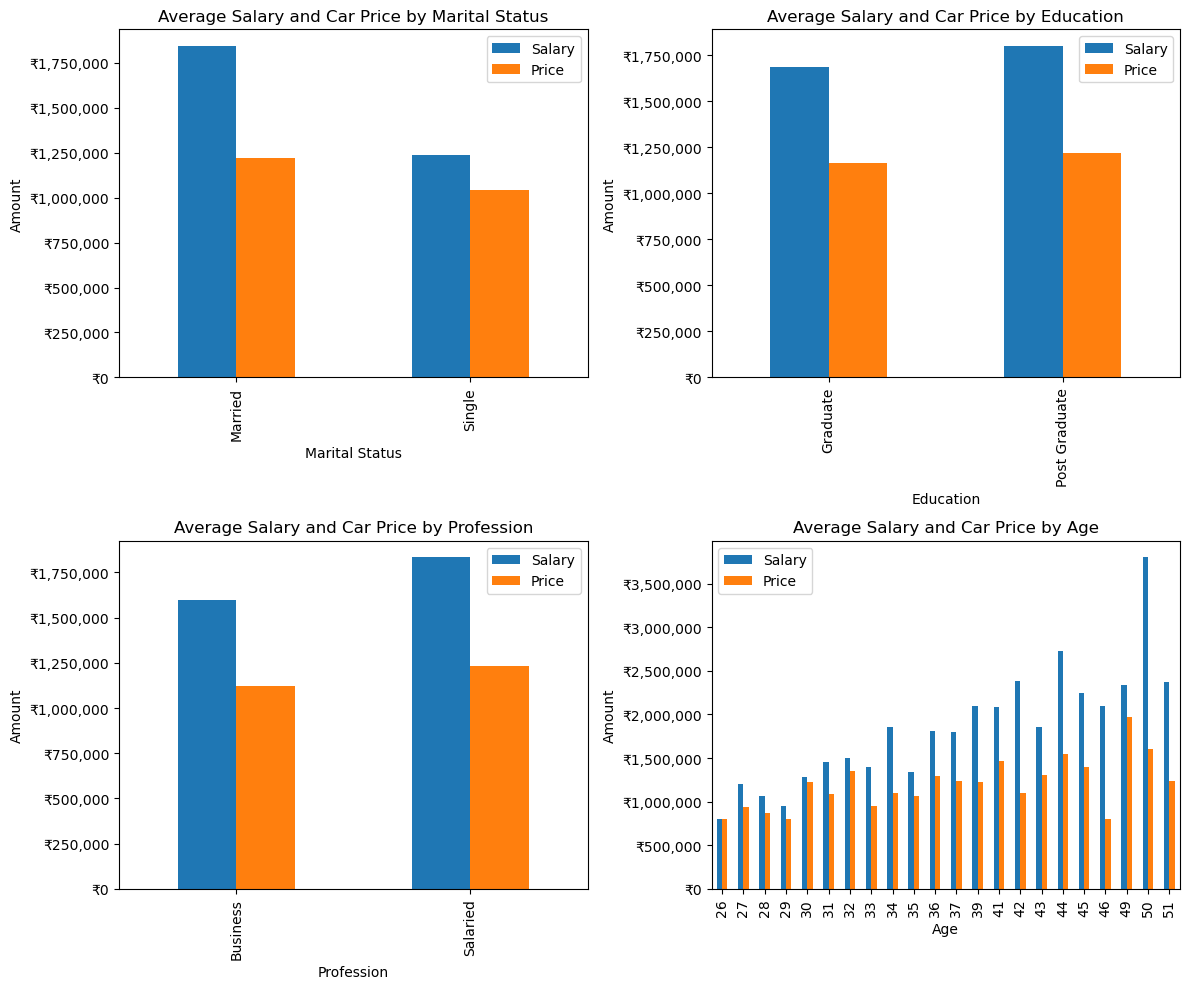

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

def salary_formatter(x, pos):
    return '₹{:,.0f}'.format(x)


grouped_marital = df.groupby('Marrital Status').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_marital.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Salary and Car Price by Marital Status')
axes[0, 0].set_xlabel('Marital Status')
axes[0, 0].set_ylabel('Amount')
axes[0, 0].yaxis.set_major_formatter(salary_formatter)

grouped_education = df.groupby('Education').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_education.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Salary and Car Price by Education')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Amount')
axes[0, 1].yaxis.set_major_formatter(salary_formatter)


grouped_profession = df.groupby('Profession').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_profession.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Salary and Car Price by Profession')
axes[1, 0].set_xlabel('Profession')
axes[1, 0].set_ylabel('Amount')
axes[1, 0].yaxis.set_major_formatter(salary_formatter)

grouped_age = df.groupby('Age').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_age.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Salary and Car Price by Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Amount')
axes[1, 1].yaxis.set_major_formatter(salary_formatter)

plt.tight_layout()
plt.show()